<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/BT_Nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/train1',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 245 images belonging to 5 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/validation1',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 50 images belonging to 5 classes.


In [ ]:
training_data.class_indices

{'hoacuc': 0, 'hoahong': 1, 'hoamai': 2, 'hoasen': 3, 'hoasung': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32  lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64  lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128  lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_data,epochs=50,batch_size=150,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
8/8 [==============================] - 9s 790ms/step - loss: 3.3604 - accuracy: 0.1878 - val_loss: 1.6204 - val_accuracy: 0.2000
Epoch 2/50
8/8 [==============================] - 3s 353ms/step - loss: 1.5553 - accuracy: 0.2816 - val_loss: 1.5694 - val_accuracy: 0.3200
Epoch 3/50
8/8 [==============================] - 3s 368ms/step - loss: 1.7401 - accuracy: 0.2286 - val_loss: 1.6140 - val_accuracy: 0.2000
Epoch 4/50
8/8 [==============================] - 4s 519ms/step - loss: 1.5926 - accuracy: 0.2898 - val_loss: 1.5470 - val_accuracy: 0.5200
Epoch 5/50
8/8 [==============================] - 3s 368ms/step - loss: 1.3935 - accuracy: 0.4531 - val_loss: 0.9508 - val_accuracy: 0.5200
Epoch 6/50
8/8 [==============================] - 3s 380ms/step - loss: 1.3721 - accuracy: 0.5388 - val_loss: 1.6219 - val_accuracy: 0.3000
Epoch 7/50
8/8 [==============================] - 3s 366ms/step - loss: 1.5411 - accuracy: 0.3061 - val_loss: 1.2986 - val_accuracy: 0.4000
Epoch 8/50
8/8 [====

<function matplotlib.pyplot.show(close=None, block=None)>

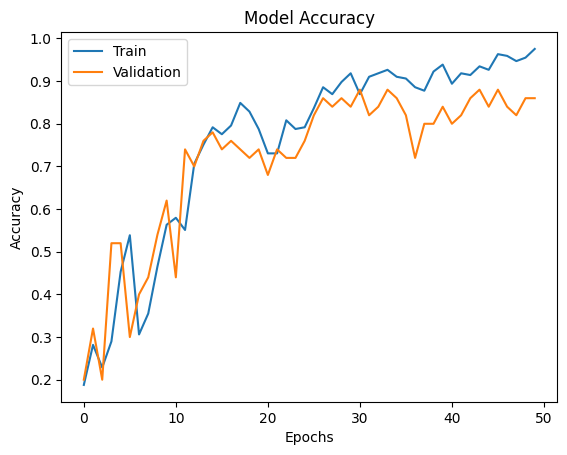

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhandienhoa.h5")

In [ ]:
model_nhandien=load_model('Nhandienhoa.h5')

1/1 [==============================] - 0s 20ms/step
hoahong


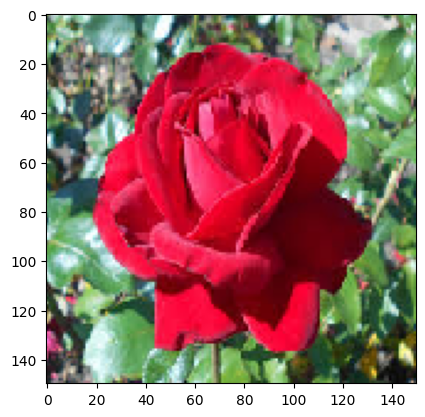

In [ ]:
img=load_img("/content/drive/MyDrive/test1/hoahong.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='hoacuc'
if round(result[0][1])==1:
  prediction='hoahong'
if round(result[0][2])==1:
  prediction='hoamai'
if round(result[0][3])==1:
  prediction='hoasen'
if round(result[0][4])==1:
  prediction='hoasung'

print(prediction)

1/1 [==============================] - 0s 30ms/step
hoamai


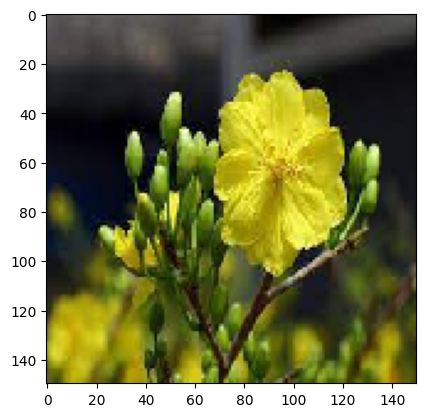

In [ ]:
img=load_img("/content/drive/MyDrive/test1/hoamai.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='hoacuc'
if round(result[0][1])==1:
  prediction='hoahong'
if round(result[0][2])==1:
  prediction='hoamai'
if round(result[0][3])==1:
  prediction='hoasen'
if round(result[0][4])==1:
  prediction='hoasung'

print(prediction)

1/1 [==============================] - 0s 20ms/step
hoasen


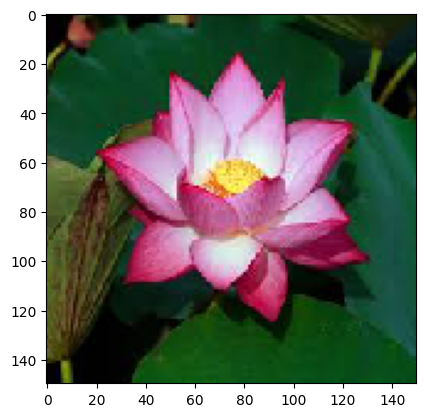

In [ ]:
img=load_img("/content/drive/MyDrive/test1/hoasen.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='hoacuc'
if round(result[0][1])==1:
  prediction='hoahong'
if round(result[0][2])==1:
  prediction='hoamai'
if round(result[0][3])==1:
  prediction='hoasen'
if round(result[0][4])==1:
  prediction='hoasung'

print(prediction)

1/1 [==============================] - 0s 22ms/step
hoasung


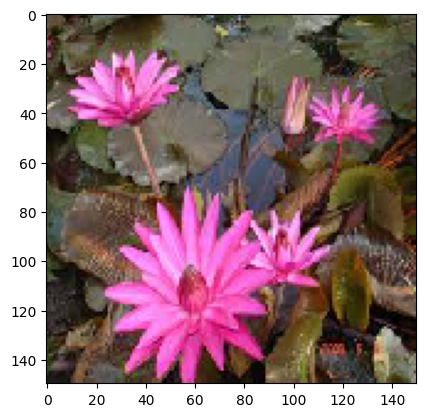

In [ ]:
img=load_img("/content/drive/MyDrive/test1/hoasung.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='hoacuc'
if round(result[0][1])==1:
  prediction='hoahong'
if round(result[0][2])==1:
  prediction='hoamai'
if round(result[0][3])==1:
  prediction='hoasen'
if round(result[0][4])==1:
  prediction='hoasung'

print(prediction)

1/1 [==============================] - 0s 34ms/step
hoacuc


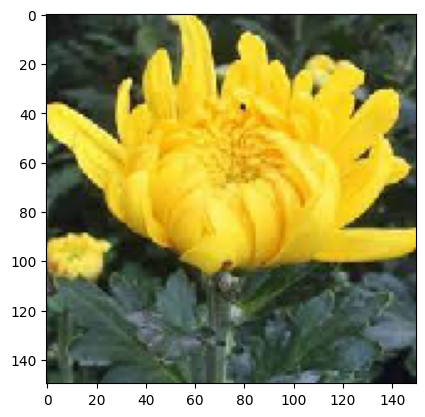

In [ ]:
img=load_img("/content/drive/MyDrive/test1/hoacuc.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='hoacuc'
if round(result[0][1])==1:
  prediction='hoahong'
if round(result[0][2])==1:
  prediction='hoamai'
if round(result[0][3])==1:
  prediction='hoasen'
if round(result[0][4])==1:
  prediction='hoasung'

print(prediction)